#                        Uncertainity Estimation

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 42)
scaler = StandardScaler()

/home/akkasi/Documents/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/akkasi/Documents/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/akkasi/Documents/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/akkasi/Documents/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
x_train_scaled = scaler.fit(x_train).transform(x_train)
x_test_scaled = scaler.fit(x_test).transform(x_test)

In [3]:
svm = SVC(C=1000,kernel='poly')
svm.fit(x_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
print('The decision function is:\n\n{}'.format(svm.decision_function(x_test_scaled)
                                              [:20]))

The decision function is:

[  0.79837914 -19.05625696  -0.3204953    3.0404248    3.98571157
 -86.60979478 -60.59140696  -0.71898183   0.61885745   4.99692352
   0.75548792  -1.20229015   5.8880878   -0.58618926   5.33650899
  -4.27251068   6.61581301   7.97530045  20.04871449 -17.33196522]


In [5]:
print('Threshold decision function is:\n\n{}'.format(svm.decision_function(x_test_scaled)
                                              [:20]>0))

Threshold decision function is:

[ True False False  True  True False False False  True  True  True False
  True False  True False  True  True  True False]


# Predicting Probabilities

In [6]:
svm1 = SVC(C=1000,probability=True)
svm1.fit(x_train_scaled,y_train)
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm1.predict_log_proba(x_test_scaled)[:20]))

Predicted probabilities for the samples (malignant and benign):

[[-3.38947461e+00 -3.43082466e-02]
 [-2.00192949e-03 -6.21464462e+00]
 [-2.61009315e-03 -5.94967413e+00]
 [-1.70872446e+01 -3.79405802e-08]
 [-1.60527688e+01 -1.06750792e-07]
 [-5.27182165e-02 -2.96903753e+00]
 [-2.72803956e-02 -3.61519613e+00]
 [-4.05574573e-01 -1.09839340e+00]
 [-1.48971164e+00 -2.55457122e-01]
 [-4.86082995e+00 -7.77419495e-03]
 [-3.07709349e+00 -4.71891301e-02]
 [-6.97220866e-02 -2.69789663e+00]
 [-1.20757531e+01 -5.69597816e-06]
 [-7.50678883e-02 -2.62666155e+00]
 [-4.88875703e+00 -7.55927669e-03]
 [-4.14872333e-02 -3.20304143e+00]
 [-1.27626920e+01 -2.86572116e-06]
 [-1.35040832e+01 -1.36537354e-06]
 [-1.14536408e+01 -1.06108292e-05]
 [-2.59319089e-03 -5.95616247e+00]]


In [7]:
svm1.predict(x_test_scaled)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

## Uncertainity Estimation in Multiclass Datasets

In [8]:
from sklearn.datasets import load_iris
iris =load_iris()
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=42)
gbr = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbr.fit(x_train,y_train)

/home/akkasi/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [9]:
print('The decision function for the the 3-class iris dataset:\n\n:{}'.format(gbr.decision_function(x_test[:10])))

The decision function for the the 3-class iris dataset:

:[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]]


In [10]:
print('predicted probabilities for the samples in the iris data sets:\n\n{}'.format(gbr.predict_proba(x_test[:10])))

predicted probabilities for the samples in the iris data sets:

[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]
 [0.10664722 0.7840248  0.10932798]
 [0.10170311 0.10829611 0.79000078]
 [0.10664722 0.7840248  0.10932798]
 [0.10664722 0.7840248  0.10932798]]


# Binarizarion , Mean Removal, Scalling, Nomalization

In [11]:
from sklearn import preprocessing
import numpy as np
data = np.array([[2.2,5.9,-1.8],[5.4,-3.2,-5.1],[-1.9,4.2,3.3]])

bindata = preprocessing.Binarizer(threshold=1.5).transform(data)
print('Binarized data:\n\n',bindata)


Binarized data:

 [[1. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [12]:
print('Mean Before equals: ', data.mean(axis=0))
print('Standard Deviatio before is: ', data.std(axis=0))

Mean Before equals:  [ 1.9  2.3 -1.2]
Standard Deviatio before is:  [2.98775278 3.95052739 3.45543051]


In [13]:
scaled_data = preprocessing.scale(data)
print('Mean After equals: ', scaled_data.mean(axis=0))
print('Standard Deviatio After is: ', scaled_data.std(axis=0))

Mean After equals:  [0. 0. 0.]
Standard Deviatio After is:  [1. 1. 1.]


In [14]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))


In [15]:
scaled_data1 = minmax_scaler.fit_transform(data)
print('Minmax applied on the data:\n\n', scaled_data1)

Minmax applied on the data:

 [[0.56164384 1.         0.39285714]
 [1.         0.         0.        ]
 [0.         0.81318681 1.        ]]


In [16]:
data_l1 = preprocessing.normalize(data,norm='l1')
data_l2 = preprocessing.normalize(data,norm='l2')
print('L1 normalized data:\n',data_l1)
print('L2 normalized data:\n',data_l2)

L1 normalized data:
 [[ 0.22222222  0.5959596  -0.18181818]
 [ 0.39416058 -0.23357664 -0.37226277]
 [-0.20212766  0.44680851  0.35106383]]
L2 normalized data:
 [[ 0.3359268   0.90089461 -0.2748492 ]
 [ 0.6676851  -0.39566524 -0.63059148]
 [-0.33514339  0.74084329  0.58209116]]


# Label Encoding

In [17]:
labels = ['setossa','versicolor','virginica']
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)
for i, items in enumerate(encoder.classes_):
    print(items,'->',i)

setossa -> 0
versicolor -> 1
virginica -> 2


In [18]:
more_labels = ['versicolor','versicolor','virginica','setossa','versicolor']

In [19]:
more_labels_encoded = encoder.transform(more_labels)
print('More labels = ',more_labels)
print('More labels encoded =',more_labels_encoded)

More labels =  ['versicolor', 'versicolor', 'virginica', 'setossa', 'versicolor']
More labels encoded = [1 1 2 0 1]


# Feature Selection


In [22]:
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
x_w_noise = np.hstack([cancer.data,noise])
x_train,x_test,y_train,y_test = train_test_split(x_w_noise,cancer.target,
                                                random_state =0,test_size =0.5)

select = SelectPercentile(percentile=50)
select.fit(x_train,y_train)
x_train_selected = select.transform(x_train)

print('x_train.shape is {}'.format(x_train.shape))
print('x_train_selected.shape is {}'.format(x_train_selected.shape))

x_train.shape is (284, 80)
x_train_selected.shape is (284, 40)


/home/akkasi/Documents/software/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [23]:
import matplotlib.pyplot as plt

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


/home/akkasi/Documents/software/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


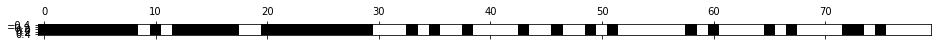

In [24]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [31]:
select.fit(x_train,y_train)
x_train_selected = select.transform(x_train)

print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_train_selected is: {}'.format(x_train_selected.shape))


The shape of x_train is: (284, 80)
The shape of x_train_selected is: (284, 40)


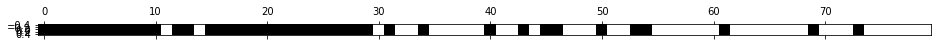

In [33]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [34]:
x_test_selected = select.transform(x_test)
